In [1]:
# warning 제거 
import warnings 
warnings.filterwarnings(action='ignore')


import seaborn as sns
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import MultiLabelBinarizer 
from sklearn.model_selection import train_test_split
import numpy as np

from module.Font import Fontmanager
path = Fontmanager()

from module.split import split_first
from module.category import *
from module.BubbleChart import BubbleChart

해당 pc의 운영 체제는 Darwin이며 Arial Unicode MS로 설정되었습니다


In [2]:
# 데이터 로드
movie = pd.read_csv('mergeusd.csv')
oscar = pd.read_csv("oscar.csv")

In [6]:
# 데이터 전처리 과정 추가
movie.loc[(movie.budget == 89.0 ), 'budget'] = 88831.0
movie.rename(columns = {'production_company_x' : 'production', 
                        'actors_y' : 'actors' }, inplace=True)

movie['genre_first'] = split_first(movie['genre'])
movie['budget'] = movie['budget'].str.replace("$","").str.replace(",","").str.replace(".","").astype('int')
movie['worldwide_gross_income'] = movie['worldwide_gross_income'].str.replace("$","").str.replace(",","").astype('int')
movie['production'] = movie['production'].apply(production)

### 1. 제작사

In [9]:
#### 제작사별 매출이 가장 많은 영화
is_top1 = movie.sort_values(by='worldwide_gross_income', ascending=False)
top1 = is_top1.groupby('production').head(1)
top10 = top1[:10]
#colors= ['964663','c89baf','964663','c89baf','964663','c89baf','964663','c89baf','964663','c89baf','e8dbe2']
fig =px.sunburst(
    top10,
    path =['original_title','production'],
    color = 'worldwide_gross_income',
    color_continuous_scale="PuRd",
    values='worldwide_gross_income')
fig.show()

In [10]:
#### 제작사별 예산이 가장 큰 영화
fig =px.sunburst(
    top10,
    path =['original_title','production'],
    color = 'budget',
    color_continuous_scale="PuRd",
    values='budget')
fig.show()

### 2. 등급

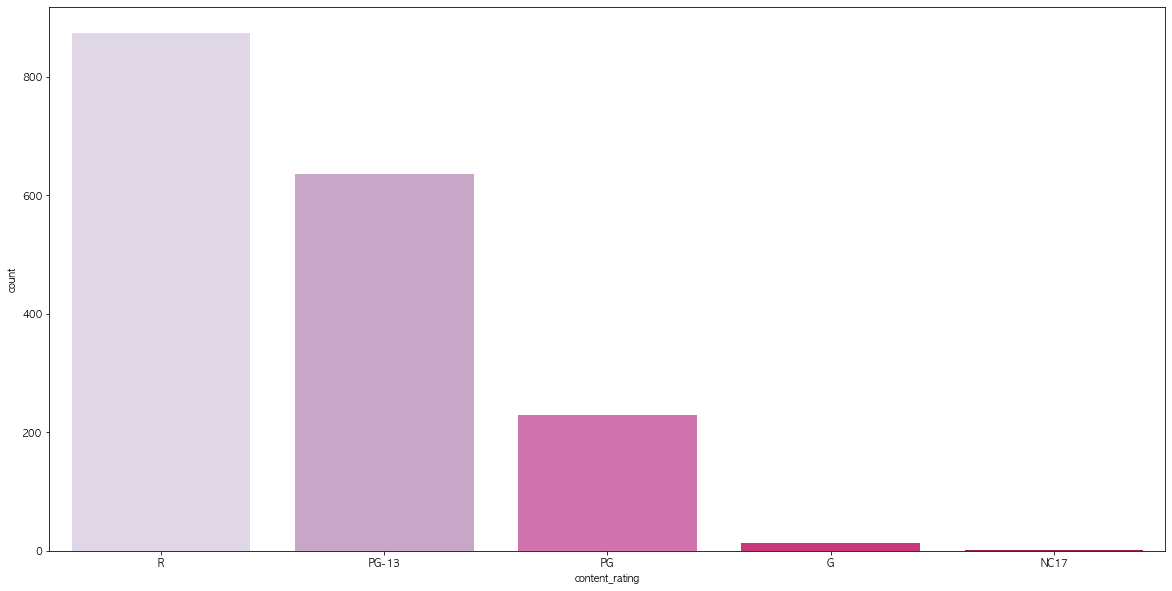

In [11]:
# 전체적인 등급 분포
plt.figure(figsize=(20,10))
sns.countplot(x="content_rating", data=movie, palette="PuRd", order=movie['content_rating'].value_counts().index)
plt.savefig('16.png', facecolor='#ffffff') 
plt.show();

### 3. 장르

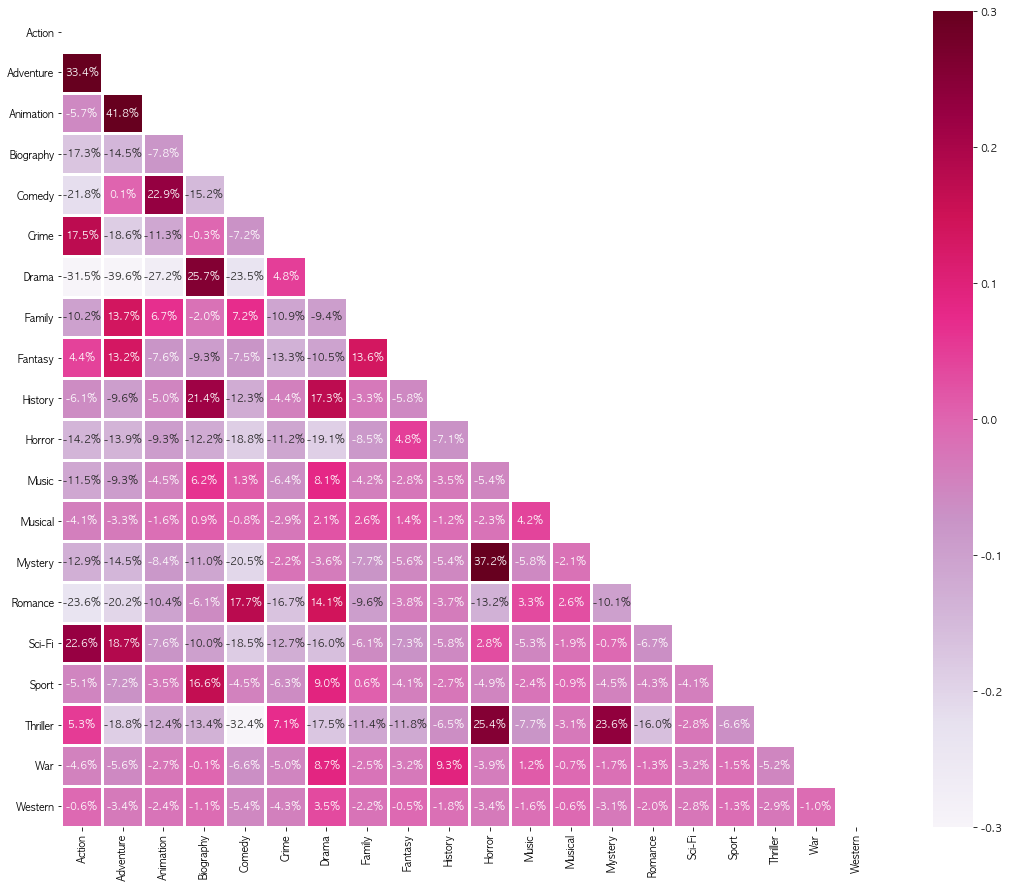

In [12]:
#### 장르간의 상관관계

movie['genre2'] = movie['genre'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))   
test = movie['genre2']
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
corr = res.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr, mask=mask, annot=True, cmap='PuRd',fmt=".1%", vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
plt.savefig('1.png', facecolor='#ffffff') 
plt.show();

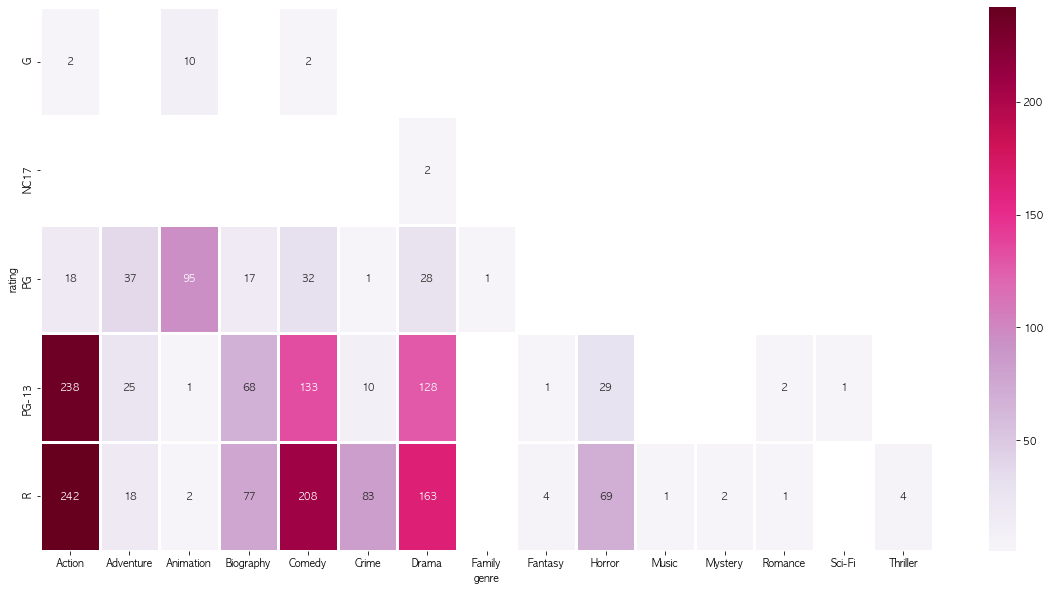

In [13]:
#### 장르와 등급 분포

df = movie[['content_rating', 'genre_first' ]]
df = movie.groupby('content_rating', sort=True)['genre_first'].value_counts().unstack()


fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df, annot=True, cmap="PuRd", fmt="g", linewidths=2.5)
plt.xlabel ('genre')
plt.ylabel ('rating')
plt.savefig('2.png', facecolor='#ffffff') 
plt.show();

### 4. 개봉 시기

In [14]:
movie['date_published'] = pd.to_datetime(movie['date_published'])
movie['month'] = movie['date_published'].apply(lambda date_published: date_published.month)
movie['month'] = movie['month'].apply(month)

In [15]:
is_season = movie['month'].value_counts().to_frame()
seasons = {'Jan' : 'Winter',
           'Feb' : 'Winter',
           'Mar' : 'Spring',
           'Apr' : 'Spring',
           'May' : 'Spring',
           'Jun' : 'Summer',
           'Jul' : 'Summer',
           'Aug' : 'Summer',
           'Sep' : 'Fall',
           'Oct' : 'Fall',
           'Nov' : 'Fall',
           'Dec' : 'Winter'}

In [16]:
movie['season'] = movie['month'].apply(season)
winter = movie[movie['season'] == 'Winter']
spring = movie[movie['season'] == 'Spring']
summer = movie[movie['season'] == 'Summer']
Fall = movie[movie['season'] == 'Fall']

winter_df = winter['genre_first'].value_counts()[:5].to_frame()
spring_df = spring['genre_first'].value_counts()[:5].to_frame()
summer_df = summer['genre_first'].value_counts()[:5].to_frame()
Fall_df = Fall['genre_first'].value_counts()[:5].to_frame()

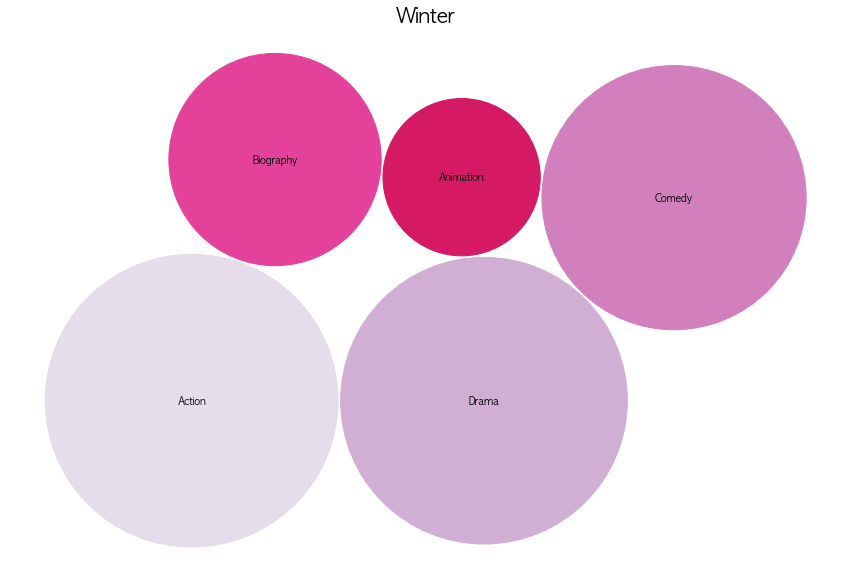

In [17]:
#### 계절별 제작 영화 장르 분포 
color = sns.color_palette('PuRd')
bubble_chart = BubbleChart(area=winter_df["genre_first"], bubble_spacing=0.1)
bubble_chart.collapse()
fig, ax = plt.subplots(figsize=(15,10),subplot_kw=dict(aspect="equal"))
bubble_chart.plot(ax, winter_df.index, color )
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Winter',  fontsize = 20)
plt.savefig('3.png', facecolor='#ffffff') 
plt.show();

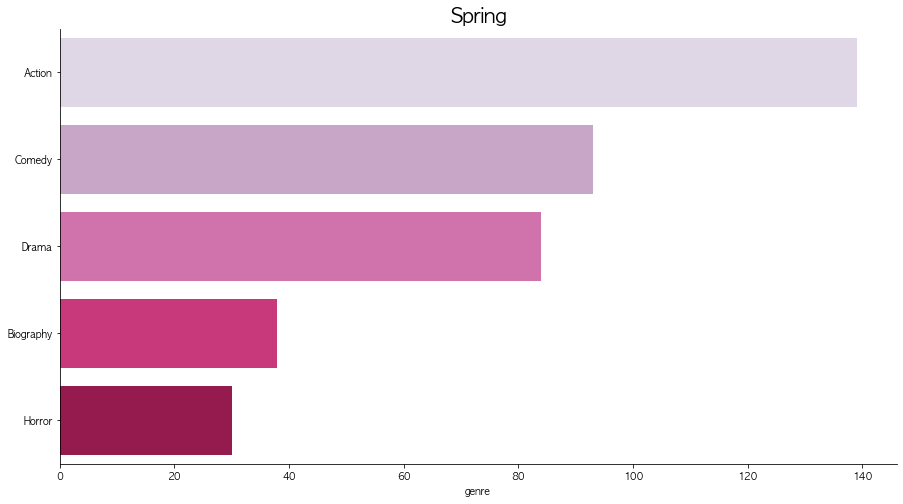

In [18]:
plt.figure(figsize=(15,8))
sns.barplot(x=spring_df["genre_first"], y=spring_df.index, palette='PuRd')
plt.xlabel('genre')
plt.title('Spring', fontsize = 20)
sns.despine()
plt.savefig('4.png', facecolor='#ffffff') 
plt.show();

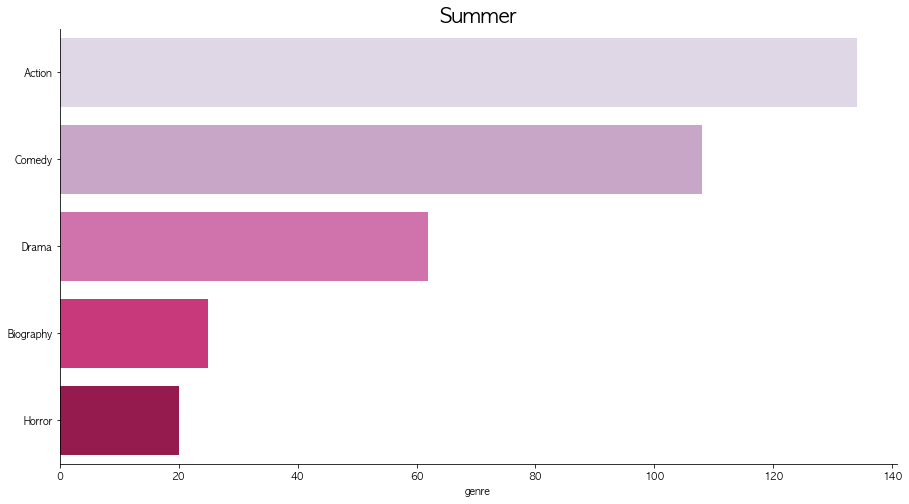

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(x=summer_df["genre_first"], y=summer_df.index, palette='PuRd')
plt.xlabel('genre')
plt.title('Summer', fontsize = 20)
sns.despine()
plt.savefig('5-1.png', facecolor='#ffffff') 
plt.show();

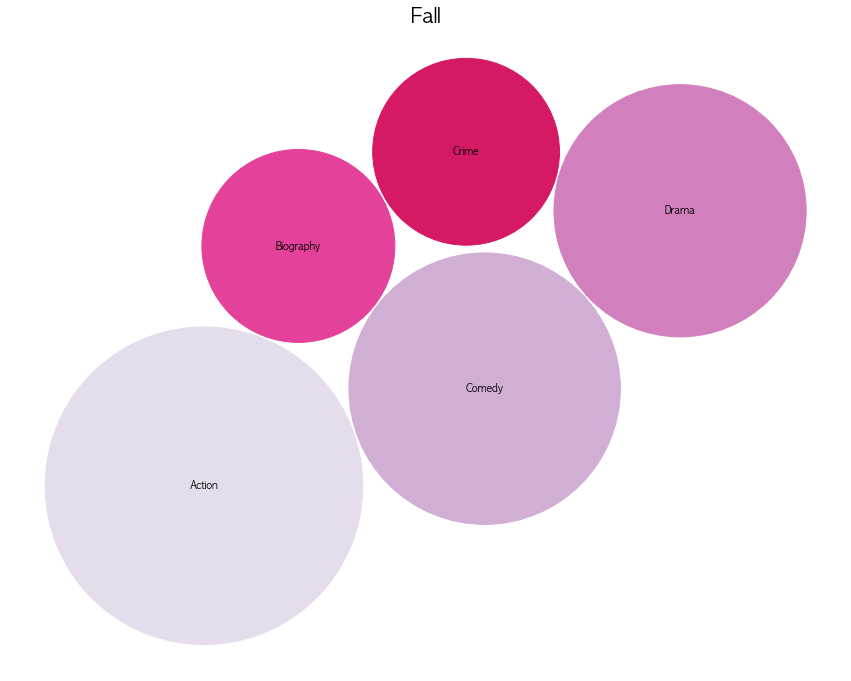

In [20]:
bubble_chart = BubbleChart(area=Fall_df["genre_first"], bubble_spacing=0.1)
bubble_chart.collapse()
fig, ax = plt.subplots(figsize=(15,15),subplot_kw=dict(aspect="equal"))
bubble_chart.plot(ax, Fall_df.index, color )
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Fall',  fontsize = 20)
plt.savefig('6-1.png', facecolor='#ffffff') 
plt.show();

### 5. 원작

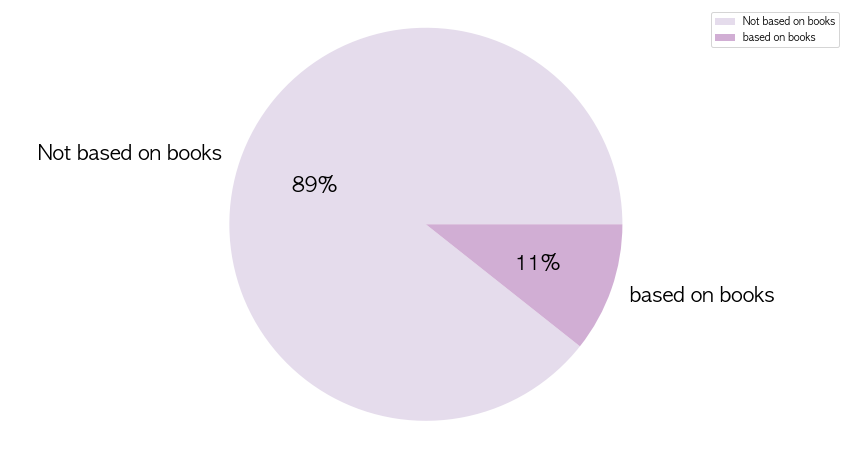

In [21]:
#### 원작 유무
eda = pd.read_csv('final_dataset_info.csv')

plt.figure(figsize=(15,8))

ratio = eda['book_label'].value_counts()
labels = ['Not based on books', 'based on books']
color = sns.color_palette('PuRd')

plt.pie(ratio, labels=labels, autopct='%.0f%%', colors=color, counterclock=True, 
        textprops={'fontsize': 20})
plt.legend()

plt.axis('equal')
plt.savefig('7.png', facecolor='#ffffff') 
plt.show();

In [22]:
eda['book_label'] = eda['book_label'].astype(object)
eda['book_label2'] = eda['book_label'].apply(baseonbooks)

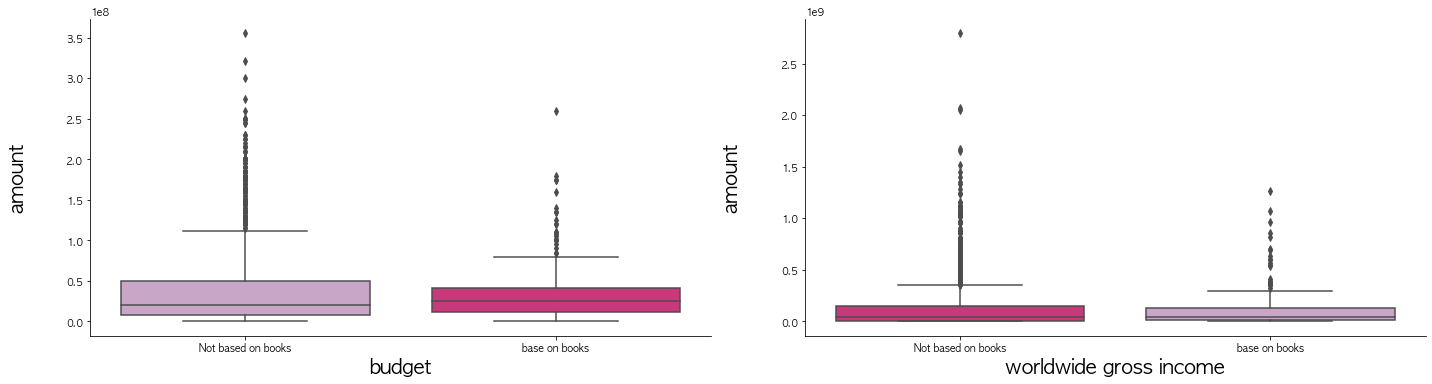

In [23]:
#### 원작유무에 따른 매출과 예산 비교

plt.figure(figsize=(20,10))
plt.subplot(221)
sns.boxplot(x=eda['book_label2'], y= eda['budget'], palette='PuRd')
plt.xlabel("budget", fontsize=20)
plt.ylabel("amount", fontsize=20, labelpad=40)
plt.subplot(222)
sns.boxplot(x=eda['book_label2'], y= eda['worldwide_gross_income'],palette='PuRd_r' )
plt.xlabel("worldwide gross income", fontsize=20)
plt.ylabel("amount", fontsize=20, labelpad=40)
sns.despine()
plt.tight_layout()
plt.savefig('8.png', facecolor='#ffffff') 
plt.show();

### 6. 아카데미

In [24]:
eda_writer = eda[eda['writer_power in oscar'] >= 2]
eda_writer['title'][425] = 'True Grit'
eda_writer['title'][33] = 'Hail, Caesar!'
eda_writer['title'][222] = 'You Will Meet a Tall Dark Stranger'
eda_writer['title'][947] = 'Inside Llewyn Davis'
eda_writer['title'][1630] = 'Wonder Wheel'

eda_writer.set_index('title',drop=True,inplace=True)

eda_writer = eda_writer['worldwide_gross_income'].sort_values(ascending=False).to_frame()
eda_writer = eda_writer[:10]

In [25]:
eda_actor = eda[eda['actor_power in oscar'] >= 2]
eda_actor['title'][123] = 'Little Fockers'
eda_actor['title'][544] = 'Captain Phillips'
eda_actor['title'][607] = 'Safe House'

eda_actor.set_index('title',drop=True,inplace=True)

eda_actor = eda_actor['worldwide_gross_income'].sort_values(ascending=False).to_frame()
eda_actor[:10]

worldwide_gross_income
title                                               
Toy Story 4                               1073394593
Toy Story 3 - La grande fuga              1066969703
Mamma Mia! Here We Go Again                399906661
Little Fockers                             310650585
Sully                                      240797623
Inferno                                    220021259
Captain Phillips                           218791811
Into the Woods                             212902372
Safe House                                 208076205
The Post                                   192938646

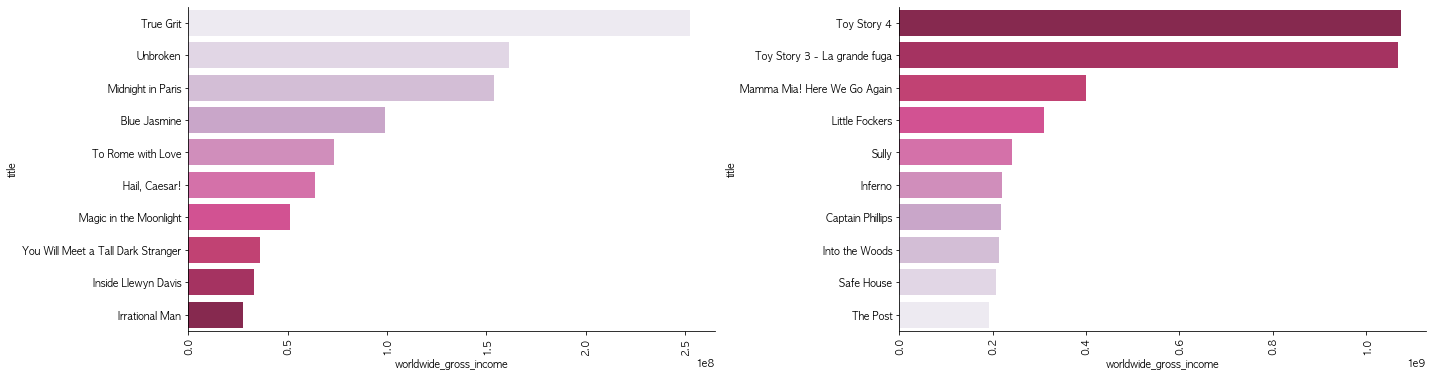

In [26]:
plt.figure(figsize=(20,10))

plt.subplot(221)
sns.barplot(x=eda_writer["worldwide_gross_income"][:10], y=eda_writer.index[:10], alpha=0.9, palette='PuRd')
plt.xticks(rotation = 90)


plt.subplot(222)
sns.barplot(x=eda_actor["worldwide_gross_income"][:10], y=eda_actor.index[:10], alpha=0.9, palette='PuRd_r')
plt.xticks(rotation = 90)
sns.despine()

plt.tight_layout()
plt.savefig('9-2.png', facecolor='#ffffff') 
plt.show()

### 7. 투자 수익률

In [27]:
movie_roi = movie[['original_title','genre', 'worldwide_gross_income', 'budget']]
movie_roi['ROI'] = (movie['worldwide_gross_income']/movie['budget']) * 100
movie_roi = pd.DataFrame(movie_roi)
movie_roi = movie_roi.sort_values(by="ROI", ascending=False)
movie_roi = movie_roi.reset_index(drop=True)
roi_20 = movie_roi[:20]

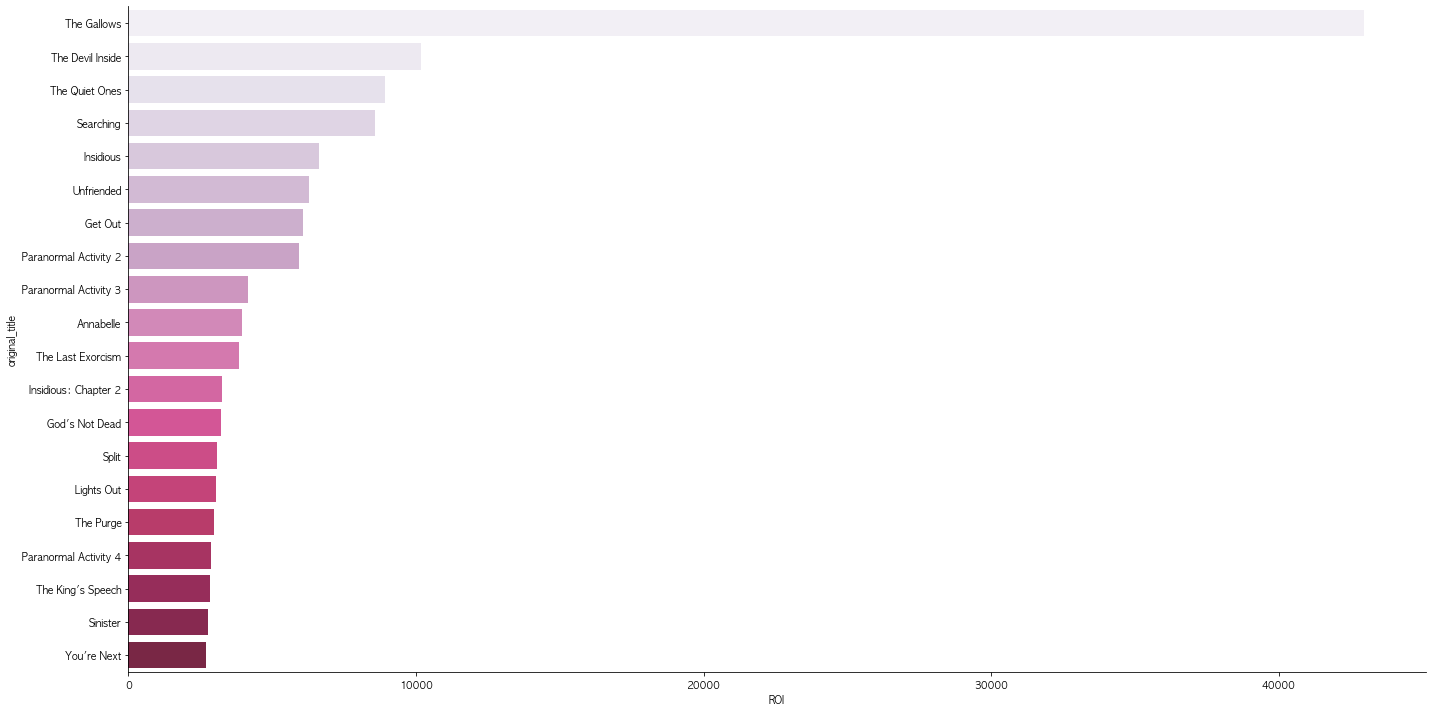

In [28]:
# 투자 수익률 top 20
plt.figure(figsize=(20,10))
sns.barplot(x=roi_20["ROI"], y=roi_20["original_title"], alpha=0.9, palette='PuRd')
sns.despine()
plt.tight_layout()
plt.savefig('12.png', facecolor='#ffffff') 
plt.show()

In [29]:
# 투자 수익률 top 20 영화 장르
roi_20_genre = roi_20[['original_title', 'genre', 'ROI']]

roi_20_genre1 = roi_20_genre['genre'].str.split(',').str[0]
roi_20_genre2 = roi_20_genre['genre'].str.split(',').str[1]
roi_20_genre3 = roi_20_genre['genre'].str.split(',').str[2]

roi_genre = pd.concat([roi_20_genre, pd.DataFrame(roi_20_genre1), pd.DataFrame(roi_20_genre2),
                      pd.DataFrame(roi_20_genre3)], 1)

roi_genre.columns = ['title', 'full_genre', 'ROI', 'genre1', 'genre2', 'genre3']
chart = roi_genre['genre1'].value_counts().to_frame()

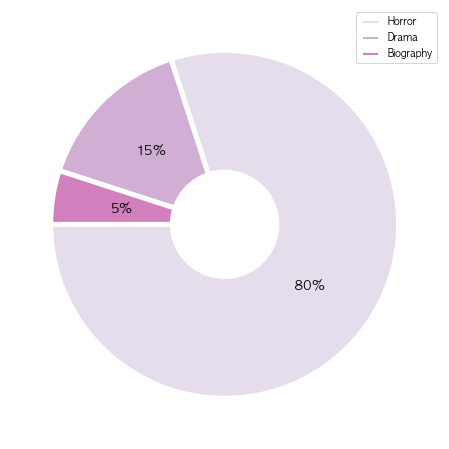

In [30]:
labels = chart.index
colors = sns.color_palette('PuRd')
wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5}
plt.figure(figsize=(15,8))
plt.pie(x=chart['genre1'], autopct='%.0f%%', startangle=180, counterclock=True, colors=colors, 
        wedgeprops=wedgeprops, textprops={'fontsize': 13})
plt.legend(labels=labels)
plt.savefig('13-1.png', facecolor='#ffffff')
plt.show();

### 8.감독

In [31]:
# 감독 별 10년동안 영화의 수와 매출합에 대한 분석
directors = movie[['title','director', 'budget','worldwide_gross_income','metascore','avg_vote','duration']]
directors['director_sum'] = 1
is_sum = directors.groupby('director').sum()
sumdic = is_sum.sort_values(by='director_sum', ascending=False)
sumdic = sumdic[:20]

budget  worldwide_gross_income  metascore  avg_vote  \
director                                                                     
Clint Eastwood      368800000              1323374112        486      54.1   
Woody Allen         130477508               456634104        416      46.9   
Ridley Scott        750000000              1992259132        434      46.1   
Steven Spielberg    671000000              1963426356        520      50.5   
Tim Burton          679000000              2031505560        352      39.5   
Steven Soderbergh   150500000               464930336        425      39.1   
David Gordon Green  119625000               329818513        360      37.9   
M. Night Shyamalan  314000000              1187229322        213      29.0   
Peter Berg          454000000               698113279        276      33.9   
Brad Peyton         399000000              1358800177        189      27.6   
Jaume Collet-Serra  177000000               669124418        286      32.9   
Paul Feig           304500000              1080772639        337      32.4   
Danny Boyle         112000000               314133106        347      35.6   
Paul W.S. Anderson  340000000              1102736080        199      27.9   
Shawn Levy          369800000               949526187        245      32.5   
David O. Russell    172000000               717933675        326      33.4   
Tim Story           136000000               466689490        202      30.9   
Sean Anders         279000000               709319968        200      31.3   
Todd Phillips       343000000              2321031035        241      34.3   
Denis Villeneuve    279800000               676726573        394      39.9   

                    duration  director_sum  
director                                    
Clint Eastwood           970             8  
Woody Allen              697             7  
Ridley Scott             929             7  
Steven Spielberg         918             7  
Tim Burton               653             6  
Steven Soderbergh        631             6  
David Gordon Green       619             6  
M. Night Shyamalan       543             5  
Peter Berg               586             5  
Brad Peyton              484             5  
Jaume Collet-Serra       523             5  
Paul Feig                596             5  
Danny Boyle              550             5  
Paul W.S. Anderson       513             5  
Shawn Levy               535             5  
David O. Russell         600             5  
Tim Story                541             5  
Sean Anders              538             5  
Todd Phillips            533             5  
Denis Villeneuve         685             5

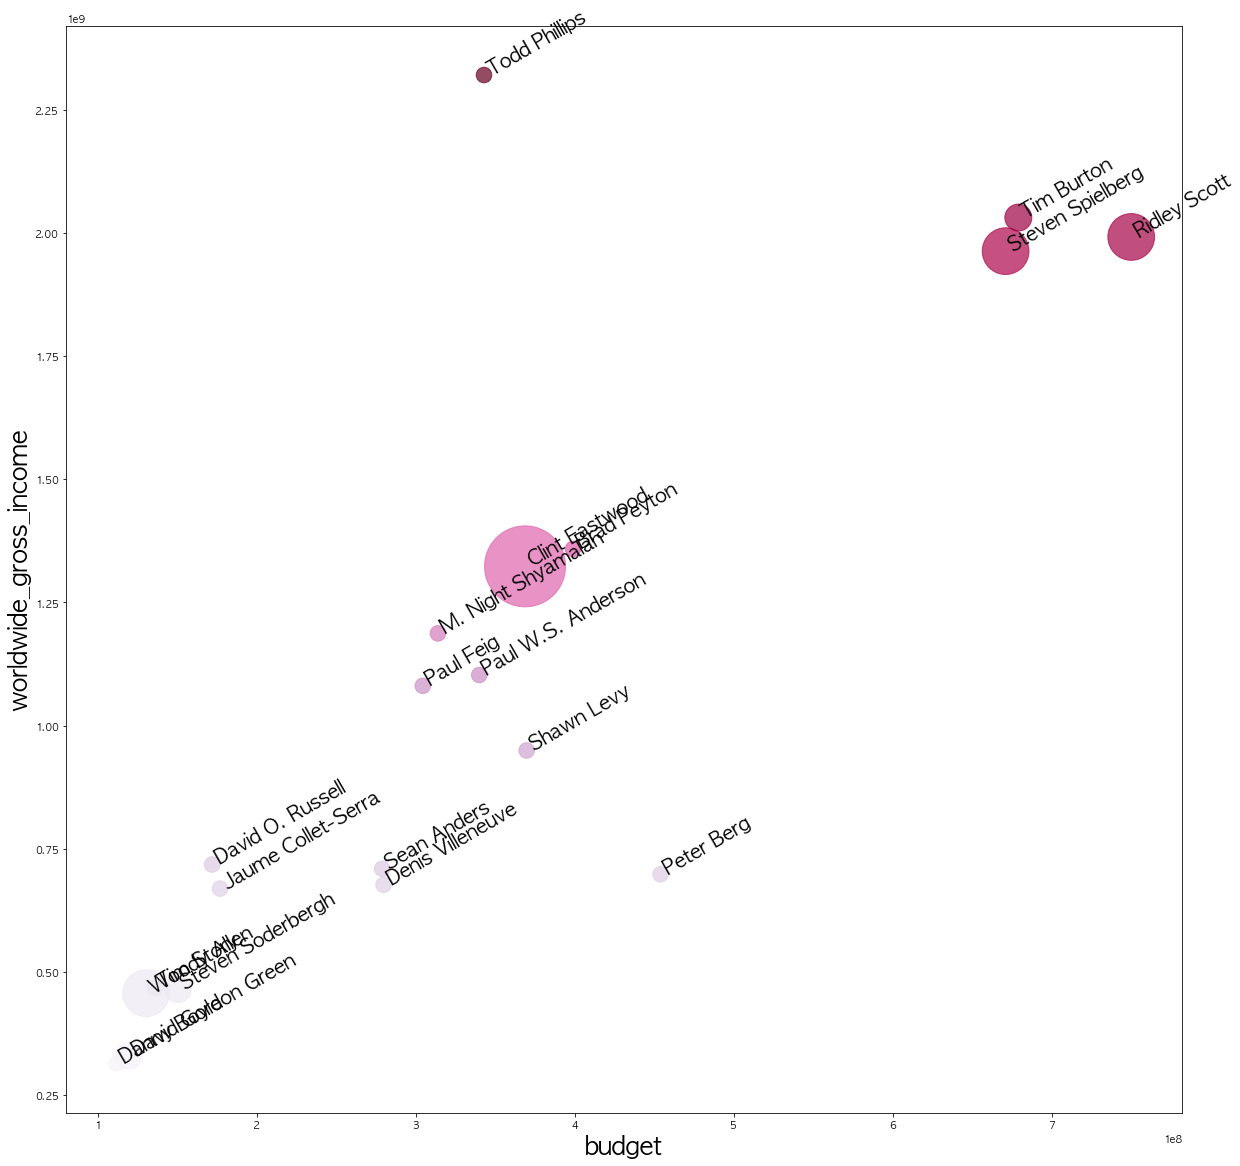

In [32]:
size_scale = [3 ** x  for x in sumdic['director_sum']]
color = []
plt.figure(figsize=(20,20))
plt.scatter(sumdic['budget'], sumdic['worldwide_gross_income'], c=sumdic['worldwide_gross_income'], cmap='PuRd', s=size_scale, alpha=0.7)
for i, d in enumerate(sumdic.index):
    plt.annotate(d, (sumdic['budget'][i]+500, sumdic['worldwide_gross_income'][i]), rotation=30, fontsize=20)
plt.xlabel('budget', fontsize=25)
plt.ylabel('worldwide_gross_income', fontsize=25)
plt.savefig('15-1.png', facecolor='#ffffff') 
plt.show();